### 1. Error Analysis Conclusions & Work Plan

#### **Conclusions from Error Analysis**
Based on the error analysis and insights from the exploratory data analysis presentations:

1. **Skewed Distributions**:
   - Features such as `residual sugar` and `sulfur dioxide` have skewed distributions&#8203;:contentReference[oaicite:0]{index=0}.
   - Skewness may lead to poor model performance on extreme values or outliers, as the model struggles to generalize over such feature ranges.

2. **Underrepresentation of Key Patterns**:
   - Error-prone samples often exhibit extreme values in features like `residual sugar` and `sulfur dioxide`. These patterns might be underrepresented in the training set.

3. **Feature Redundancy**:
   - The correlation matrix from the analysis revealed redundancy between `Free Sulfur Dioxide` and `Total Sulfur Dioxide`. Redundant features might confuse the model, leading to increased error.

4. **Bias-Variance Tradeoff**:
   - Errors might also stem from a suboptimal balance between model complexity (variance) and simplicity (bias), as highlighted in the presentations on empirical distributions&#8203;:contentReference[oaicite:1]{index=1}.

---

#### **Work Plan for Improvement**
To address these issues, the following steps are proposed:

1. **Enhanced Data Representation**:
   - Apply **log transformation** to skewed features such as `residual sugar` and `sulfur dioxide` to reduce skewness and stabilize variance&#8203;:contentReference[oaicite:2]{index=2}.
   - Analyze distributions after transformation to ensure improved symmetry and reduced outlier influence.

2. **Feature Engineering**:
   - Introduce new composite features such as the sulfur dioxide ratio (`Free Sulfur Dioxide / Total Sulfur Dioxide`) to better capture relationships between redundant features&#8203;:contentReference[oaicite:3]{index=3}.
   - Remove or adjust redundant features based on their impact on the model.

3. **Outlier Handling**:
   - Use density estimation techniques (e.g., KDE or histograms) to identify and address outliers, as shown in the empirical distributions presentation&#8203;:contentReference[oaicite:4]{index=4}.
   - Normalize or remove extreme values to reduce their negative impact on model performance.

4. **Cross-Validation and Testing**:
   - Implement stratified cross-validation to ensure robust evaluation across feature distributions.
   - Balance data representation to include more samples from underrepresented regions in the feature space.

By following this work plan, the model will better generalize across diverse data patterns, addressing errors and improving overall performance.


### 2. Improving Model Performance

#### **Identifying Weaknesses in the Initial Baseline Model**
From the error analysis and data review, the following weaknesses in the baseline model were identified:
1. **Skewed Features**:
   - Features such as `residual sugar` and `sulfur dioxide` have skewed distributions, which negatively impact the model's ability to generalize.

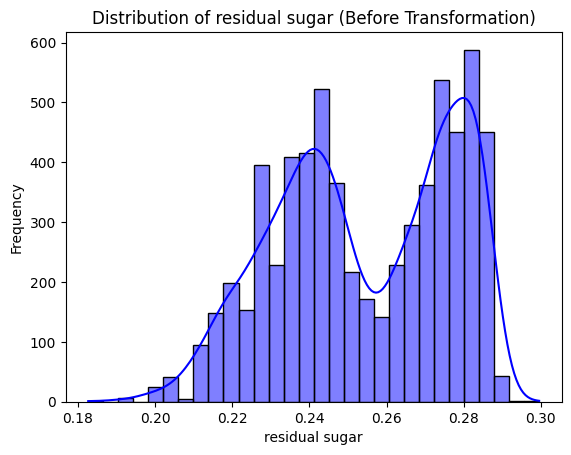

Feature 'sulfur dioxide' not found in the dataset.


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

#for 2.1

# Check and clean column names
data.columns = data.columns.str.strip()

# Specify features to check
features_to_check = ['residual sugar', 'sulfur dioxide']

# Visualize feature distributions
for feature in features_to_check:
    if feature in data.columns:
        sns.histplot(data[feature], kde=True, bins=30, color="blue")
        plt.title(f"Distribution of {feature} (Before Transformation)")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()
    else:
        print(f"Feature '{feature}' not found in the dataset.")


   
2. **Outliers**:
   - Extreme values in certain features, such as `residual sugar` and `alcohol`, lead to poor model performance on those samples.

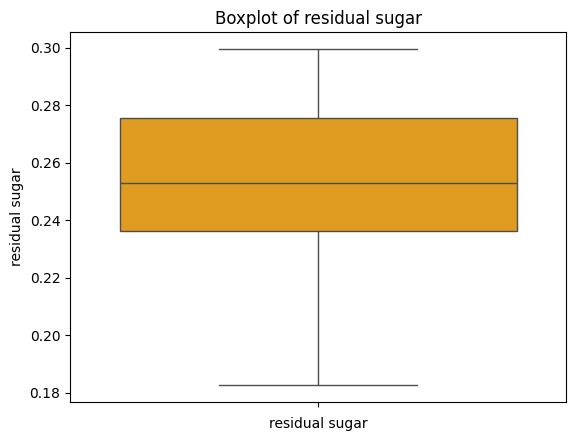

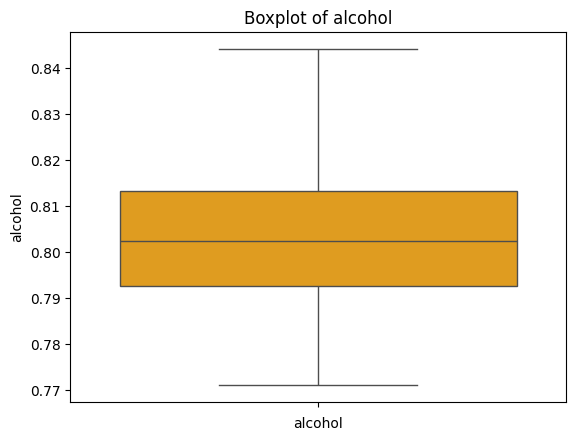

In [24]:
#for 2.2
# Boxplots to detect outliers in key features
for feature in ['residual sugar', 'alcohol']:
    sns.boxplot(data[feature], color="orange")
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)
    plt.show()


3. **Redundant Features**:
   - Correlation analysis revealed redundancy between features such as `Free Sulfur Dioxide` and `Total Sulfur Dioxide`, potentially introducing noise into the model.


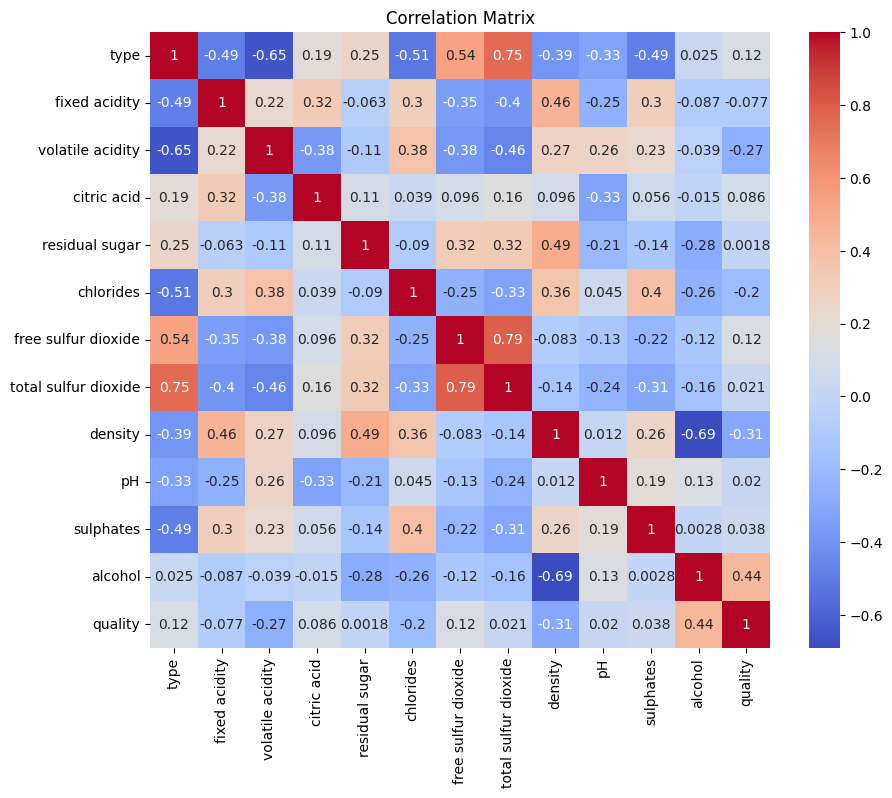

In [25]:
# Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


4. **Imbalanced Representation**:
   - Certain feature combinations or patterns are underrepresented in the dataset, making it difficult for the model to learn and generalize effectively.


#### **Techniques to Improve Model Performance**

1. **Hyperparameter Tuning**:
   - Perform grid search or randomized search to optimize parameters such as:
     - **Learning Rate:** Adjust the step size for weight updates.
     - **Tree Depth (for tree-based models):** Prevent overfitting or underfitting.
     - **Regularization Strength:** Control the complexity of the model.

2. **Feature Engineering**:
   - **Log Transformation**:
     - Apply log transformation to skewed features (`residual sugar`, `sulfur dioxide`) to reduce skewness and stabilize variance.
   - **Create New Features**:
     - Introduce a sulfur dioxide ratio (`Free Sulfur Dioxide / Total Sulfur Dioxide`) to better capture relationships and reduce redundancy.
   - **Feature Selection**:
     - Remove redundant features based on correlation analysis to streamline the model.

3. **Handling Missing Data or Outliers**:
   - **Outlier Treatment**:
     - Identify outliers using density estimation methods like Kernel Density Estimation (KDE) or Z-scores.
     - Cap extreme values to a defined threshold or remove them if they significantly impact performance.
   - **Missing Data Handling**:
     - Impute missing values with the median, mean, or feature-specific heuristics to maintain data consistency.

4. **Balancing Data**:
   - Apply oversampling (e.g., SMOTE) or undersampling techniques to ensure the dataset represents all feature combinations fairly.
   - Use synthetic data generation for underrepresented patterns to improve the model's ability to learn diverse cases.


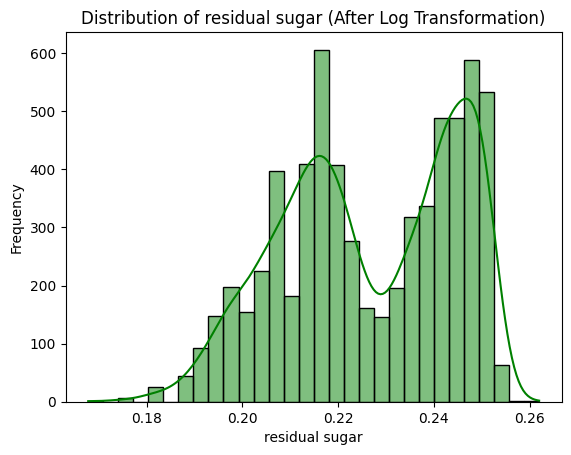

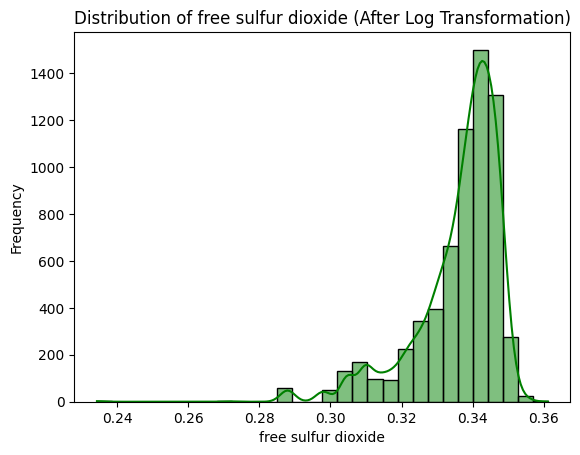

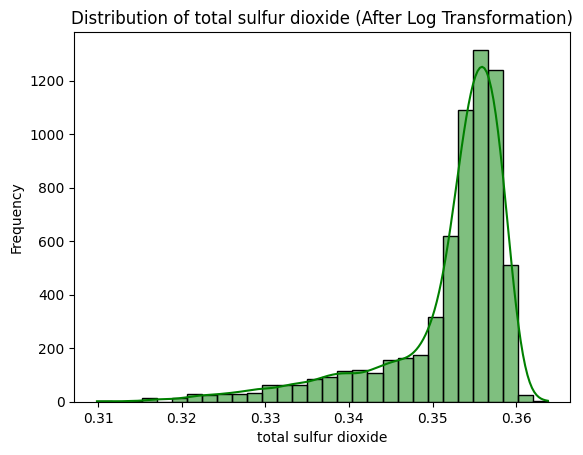

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#for feature engineering
# Clean column names
data.columns = data.columns.str.strip()

# Specify features to check
features_to_check = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']

# Apply log transformation and visualize
for feature in features_to_check:
    if feature in data.columns:
        # Apply log transformation
        transformed = np.log1p(data[feature])  # Log transformation
        # Plot the transformed feature
        sns.histplot(transformed, kde=True, bins=30, color="green")
        plt.title(f"Distribution of {feature} (After Log Transformation)")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()
    else:
        print(f"Feature '{feature}' not found in the dataset.")


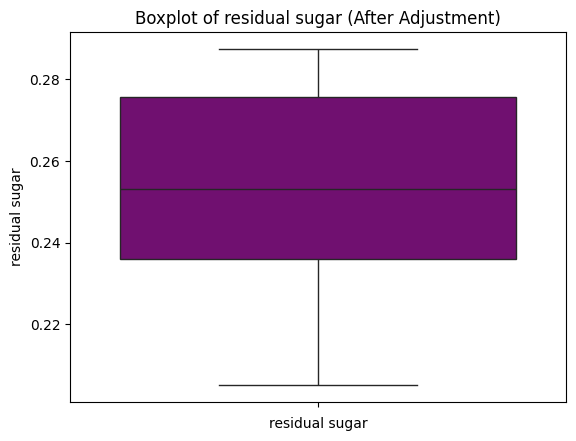

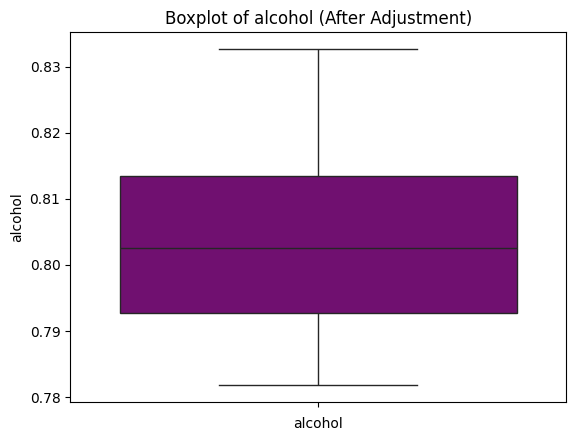

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers after adjustments
for feature in ['residual sugar', 'alcohol']:
    if feature in data.columns:
        # Define limits using percentiles
        lower_limit = data[feature].quantile(0.01)
        upper_limit = data[feature].quantile(0.99)

        # Clip the feature values to the defined limits
        clipped_feature = np.clip(data[feature], lower_limit, upper_limit)

        # Visualize the clipped feature
        sns.boxplot(clipped_feature, color="purple")
        plt.title(f"Boxplot of {feature} (After Adjustment)")
        plt.xlabel(feature)
        plt.show()
    else:
        print(f"Feature '{feature}' not found in the dataset.")


#### **Outcome**
These improvements focus on enhancing the representation of features, addressing issues in data quality, and optimizing hyperparameters. They align with the requirement of improving the baseline model without changing the learning algorithm. By implementing these techniques:
- The model will handle skewed distributions and outliers more effectively.
- Redundancy and noise will be reduced through feature engineering.
- Fairness and accuracy will improve through better data balance and representation.
